In [96]:
# Import libraries
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('diabetes.csv')

# Basic inspection
print(f"Shape: {df.shape}")
df.head()


Shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Missing values before:
 Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_5736\4170740468.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_before.index, y=missing_before.values, palette='Reds_r')


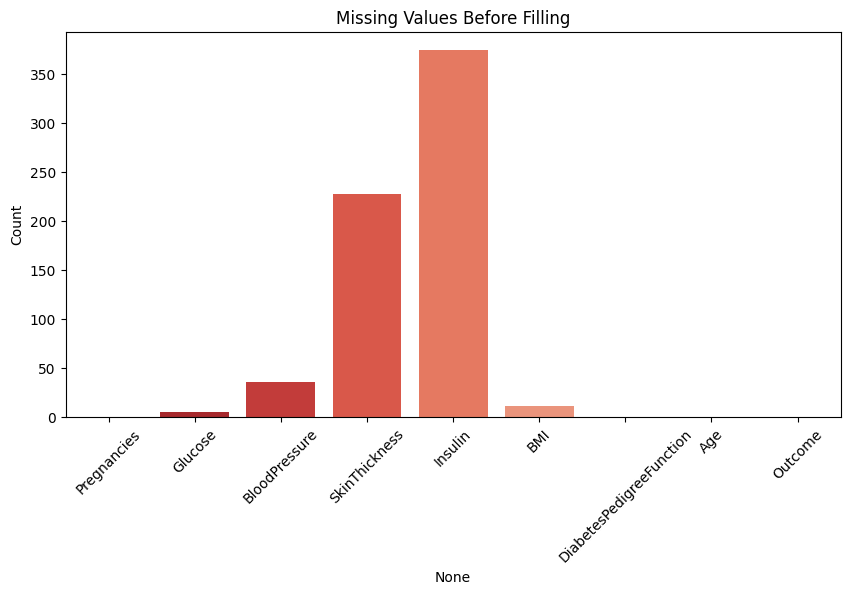


Missing values after:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_5736\4170740468.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_after.index, y=missing_after.values, palette='Greens')


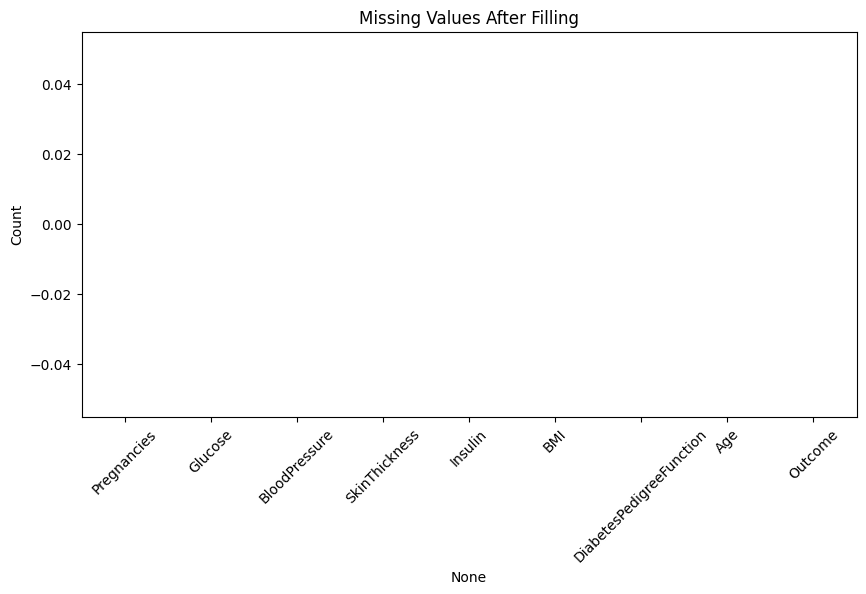

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 0s with NaN in relevant columns
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[zero_cols] = df[zero_cols].replace(0, np.nan)

# Count missing values before filling
missing_before = df.isnull().sum()

# Show counts as text
print("Missing values before:\n", missing_before)

# Visualize missing values before
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_before.index, y=missing_before.values, palette='Reds_r')
plt.title("Missing Values Before Filling")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Fill missing values with median
df.fillna(df.median(), inplace=True)

# Count missing values after filling
missing_after = df.isnull().sum()

# Show counts as text
print("\nMissing values after:\n", missing_after)

# Visualize missing values after
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_after.index, y=missing_after.values, palette='Greens')
plt.title("Missing Values After Filling")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


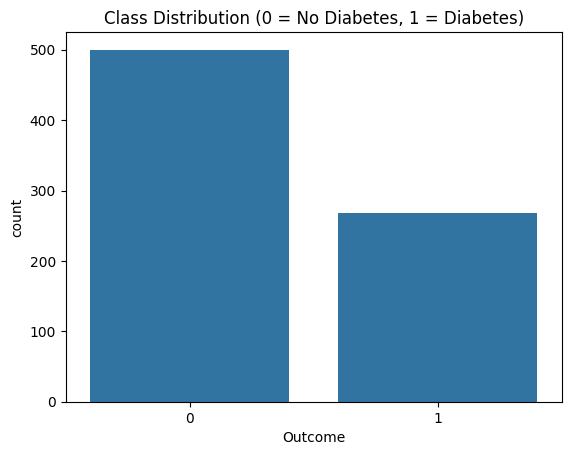

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Show class distribution
sns.countplot(x='Outcome', data=df)
plt.title("Class Distribution (0 = No Diabetes, 1 = Diabetes)")
plt.show()


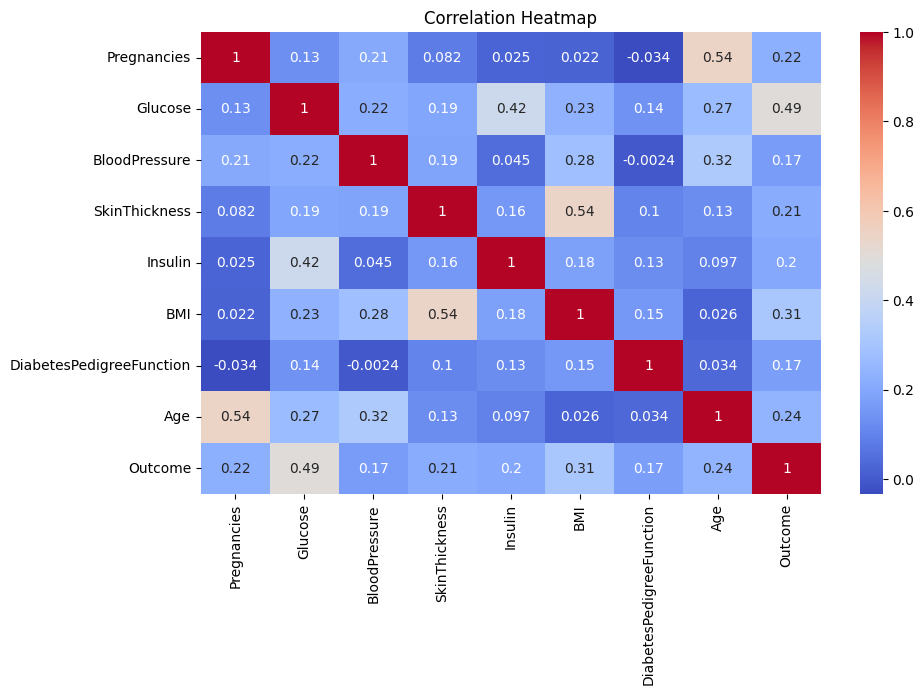

In [99]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


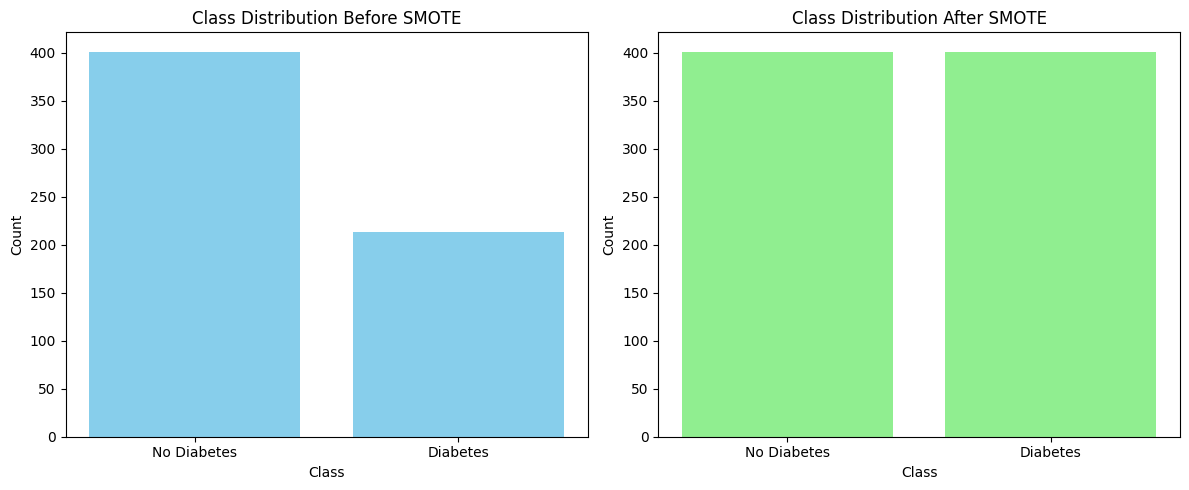

In [101]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt

# Original class distribution
original_counts = Counter(y_train)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Balanced class distribution
balanced_counts = Counter(y_train_bal)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Before SMOTE
axs[0].bar(original_counts.keys(), original_counts.values(), color='skyblue')
axs[0].set_title("Class Distribution Before SMOTE")
axs[0].set_xlabel("Class")
axs[0].set_ylabel("Count")
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['No Diabetes', 'Diabetes'])

# After SMOTE
axs[1].bar(balanced_counts.keys(), balanced_counts.values(), color='lightgreen')
axs[1].set_title("Class Distribution After SMOTE")
axs[1].set_xlabel("Class")
axs[1].set_ylabel("Count")
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['No Diabetes', 'Diabetes'])

plt.tight_layout()
plt.show()


=== Random Forest ===
Train Accuracy: 0.8534
Test Accuracy: 0.7532
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



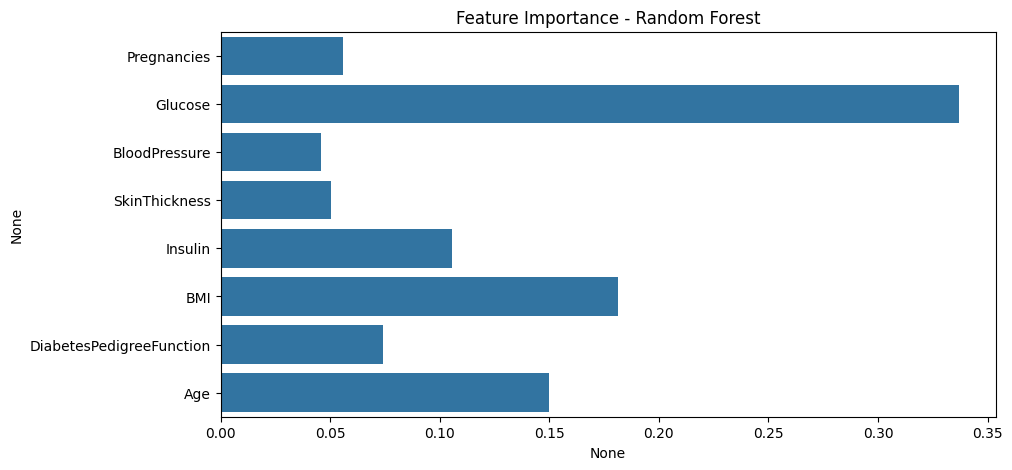

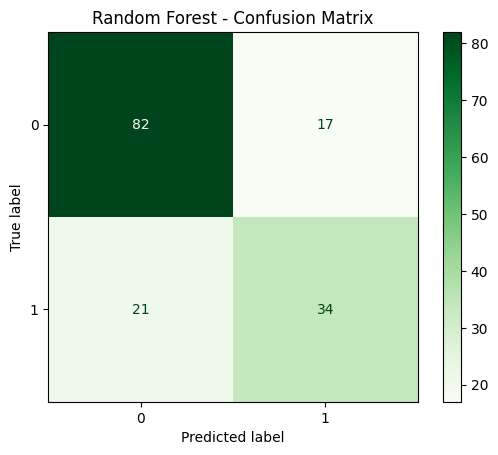

In [102]:
from sklearn.ensemble import RandomForestClassifier

# Fit the model
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]  # for ROC curve

# Accuracy
print("=== Random Forest ===")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred_rf):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_rf):.4f}")
print("Classification Report:\n", classification_report(y_test, y_test_pred_rf))

# Feature importance
feature_importance = pd.Series(rf.feature_importances_, index=df.columns[:-1])
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance - Random Forest")
plt.show()

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap='Greens')
plt.title('Random Forest - Confusion Matrix')
plt.show()


=== SVM ===
Train Accuracy: 0.8290
Test Accuracy: 0.7468
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81        99
           1       0.67      0.58      0.62        55

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



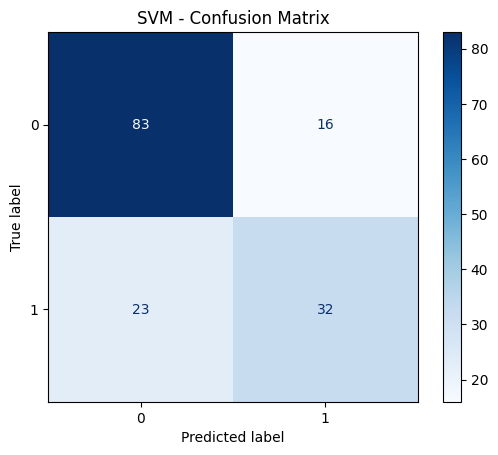

In [103]:
from sklearn.svm import SVC

# Train the model
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_train_pred_svm = svm_model.predict(X_train)
y_pred_svm = svm_model.predict(X_test)
y_proba_svm = svm_model.predict_proba(X_test)[:, 1]

# Accuracy
train_acc_svm = accuracy_score(y_train, y_train_pred_svm)
test_acc_svm = accuracy_score(y_test, y_pred_svm)

print("=== SVM ===")
print(f"Train Accuracy: {train_acc_svm:.4f}")
print(f"Test Accuracy: {test_acc_svm:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test, cmap='Blues')
plt.title('SVM - Confusion Matrix')
plt.show()


In [104]:
# Train & Evaluate Models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
}

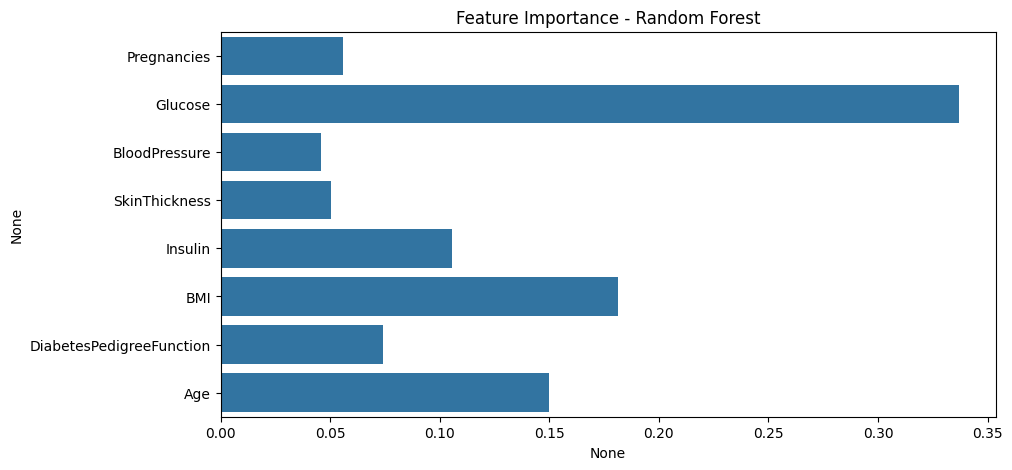

In [105]:
# Feature Importance (Random Forest)
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance - Random Forest")
plt.show()

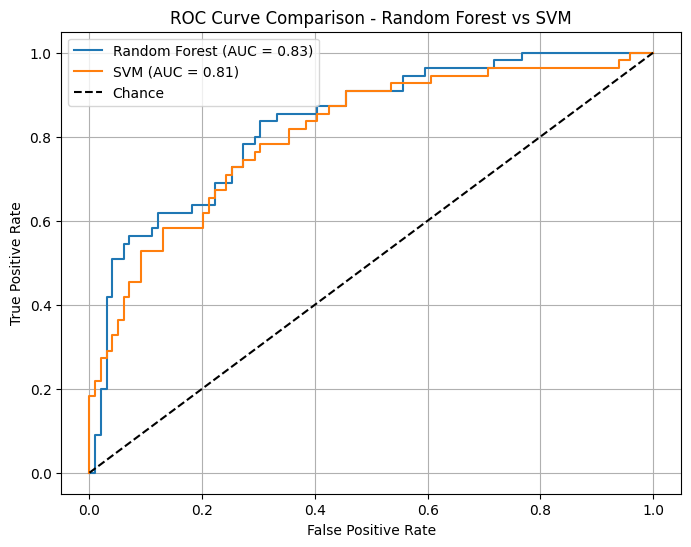

In [106]:
# ROC curves
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)

auc_rf = roc_auc_score(y_test, y_proba_rf)
auc_svm = roc_auc_score(y_test, y_proba_svm)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison - Random Forest vs SVM')
plt.legend()
plt.grid(True)
plt.show()
